
# Task4: Exploratory Data Analysis - Terrorism

# By:Sayed Mahmoud 

## Table of Contents
<ul>
<li><a href="#intro">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Data Wrangling

In [1]:
#import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolor
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from mpl_toolkits.basemap import Basemap
import folium
import folium.plugins
from matplotlib import animation,rc
import io
import base64
from IPython.display import HTML, display
import networkx as nx
from matplotlib.animation import FuncAnimation, PillowWriter 

In [2]:
#import data
df=pd.read_csv('globalterrorism.csv',encoding='ISO-8859-1')

In [3]:
#show data
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
#Rename Columns to be more readable
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
df=df[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
#Make new Columns for Casualties
df['Casualties']=df['Killed']+df['Wounded']
#Show data
df.head(3)

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Casualties
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0


In [5]:
#check for null values
df.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
Casualties      16874
dtype: int64

In [6]:
#information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Region       181691 non-null  object 
 5   city         181257 non-null  object 
 6   latitude     177135 non-null  float64
 7   longitude    177134 non-null  float64
 8   AttackType   181691 non-null  object 
 9   Killed       171378 non-null  float64
 10  Wounded      165380 non-null  float64
 11  Target       181055 non-null  object 
 12  Summary      115562 non-null  object 
 13  Group        181691 non-null  object 
 14  Target_type  181691 non-null  object 
 15  Weapon_type  181691 non-null  object 
 16  Motive       50561 non-null   object 
 17  Casualties   164817 non-null  float64
dtypes: float64(5), int64(3),

In [7]:
#statistical information about data
df.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded,Casualties
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000,164817.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668,5.296128
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392,42.069023
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


In [8]:
#check for duplicate
df.duplicated().sum()

9515

In [9]:
#remove duplicate
df.drop_duplicates(inplace=True)
#check for duplicates again
df.duplicated().sum()

0

In [10]:
df.nunique()

Year               47
Month              13
Day                32
Country           205
Region             12
city            36674
latitude        48322
longitude       48039
AttackType          9
Killed            205
Wounded           238
Target          86006
Summary        112492
Group            3537
Target_type        22
Weapon_type        12
Motive          14490
Casualties        341
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis
<ul>
<li><a href="#1">Some Basics Analysis</a></li>
<li><a href="#2">Terrorism By Region</a></li>
<li><a href="#3">Trend in Terrorist Activities</a></li>
<li><a href="#4">AttackType With Region</a></li>
<li><a href="#5">Terrorism By Country</a></li>
<li><a href="#6">Attacks vs Killed</a></li>
<li><a href="#7">Terroist Groups</a></li>
<li><a href="#8">Terror Activities in Egypt</a></li>
</ul>

<a id='1'></a>
### Some Basics Analysis

In [11]:
print('Country with Highest Terrorist Attacks:',df['Country'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',df['Region'].value_counts().index[0])
print('Maximum people killed in an attack are:',df['Killed'].max(),'that took place in',df.loc[df['Killed'].idxmax()].Country)

Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Maximum people killed in an attack are: 1570.0 that took place in Iraq


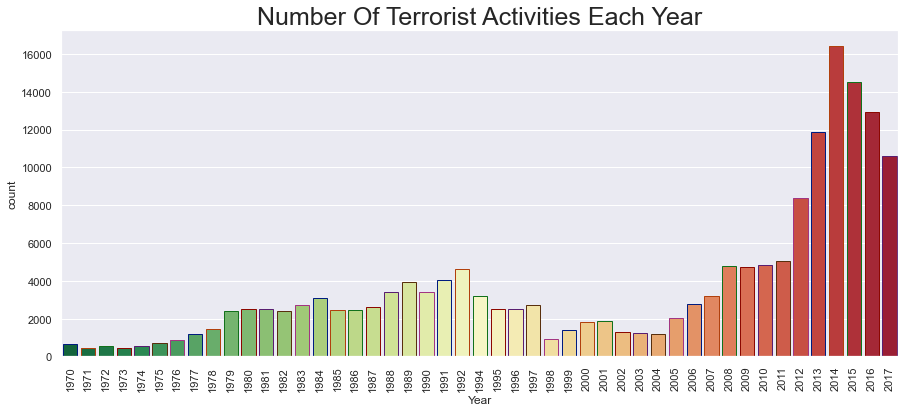

In [12]:
sns.set()
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=df,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year',fontsize=25)
plt.show()

We can clearly see that the number of terrorist activities have gone up sharply after 2000. 

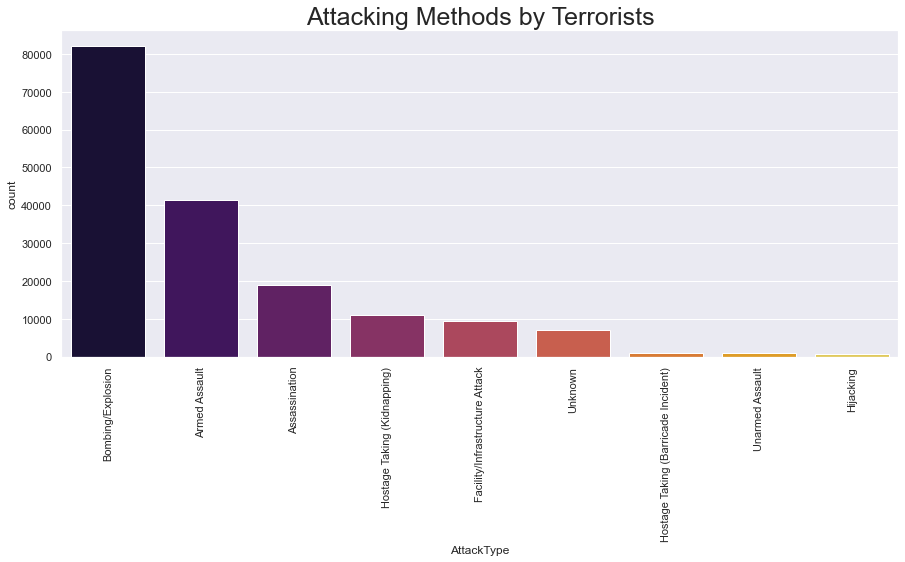

In [13]:
plt.subplots(figsize=(15,6))
sns.countplot('AttackType',data=df,palette='inferno',order=df['AttackType'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods by Terrorists',fontsize=25)
plt.show()

We can see that The most Attack method used is `Bombing/Explosion`

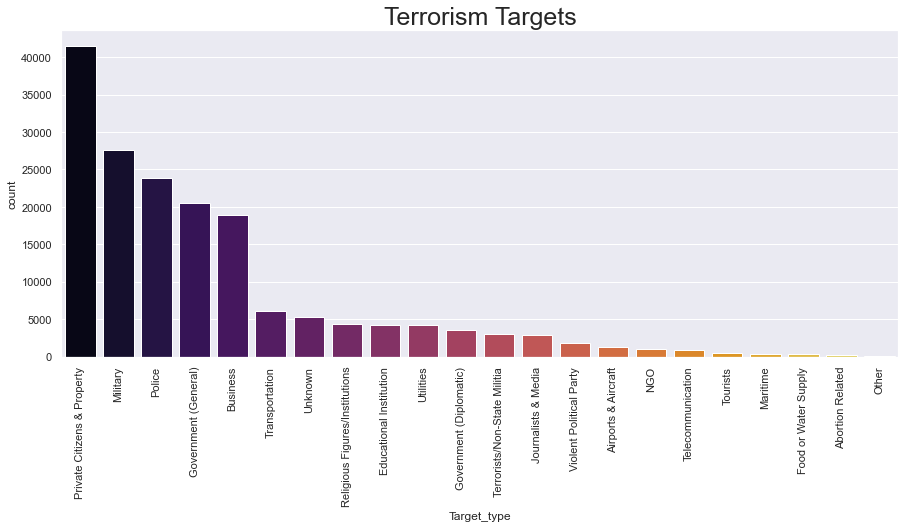

In [14]:
plt.subplots(figsize=(15,6))
sns.countplot(df['Target_type'],palette='inferno',order=df['Target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Terrorism Targets',fontsize=25)
plt.show()

We can see that Terrorism Targets the private Citizens & Property Mostly

<a id='2'></a>
### Terrorism By Region

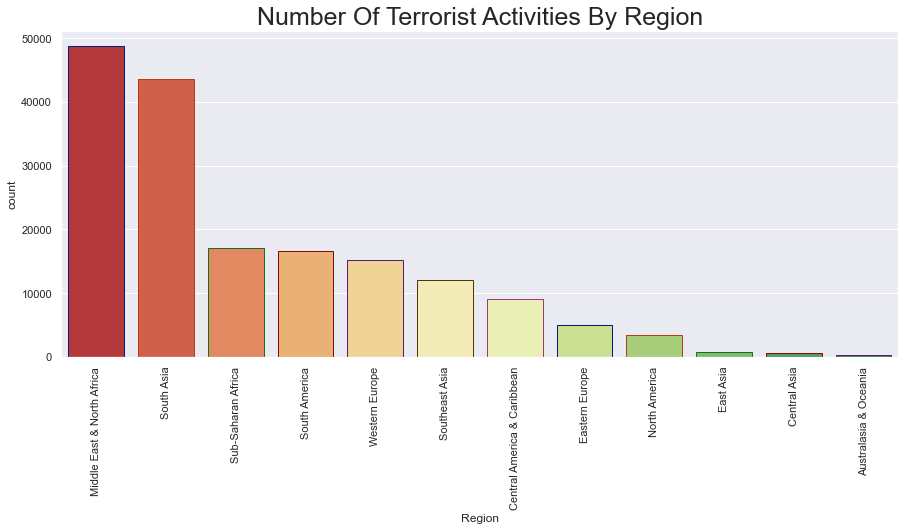

In [15]:
plt.subplots(figsize=(15,6))
sns.countplot('Region',data=df,palette='RdYlGn',edgecolor=sns.color_palette('dark',7),order=df['Region'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities By Region',fontsize=25)
plt.show()

Middle East and North Africa are the most terrorism prone regions followed by South Asia. Collectively we can say that The African and Asian Continent experience the highest terrorist attacks. But why are these regions prone to terrorism? Does this have any relation to the mindset of the people? or any other reason??

<a id='3'></a>
### Trend in Terrorist Activities

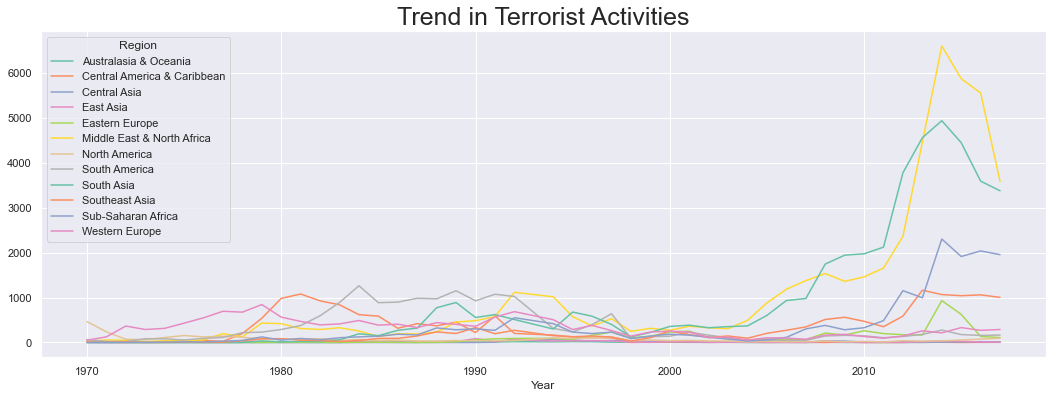

In [16]:
terror_region=pd.crosstab(df.Year,df.Region)
terror_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title('Trend in Terrorist Activities',fontsize=25)
plt.show()

As seen already, Middle-East,North Africa,South Asia have seen a shoot in the number of terrorist activities over the years.

<a id='4'></a>
### AttackType With Region

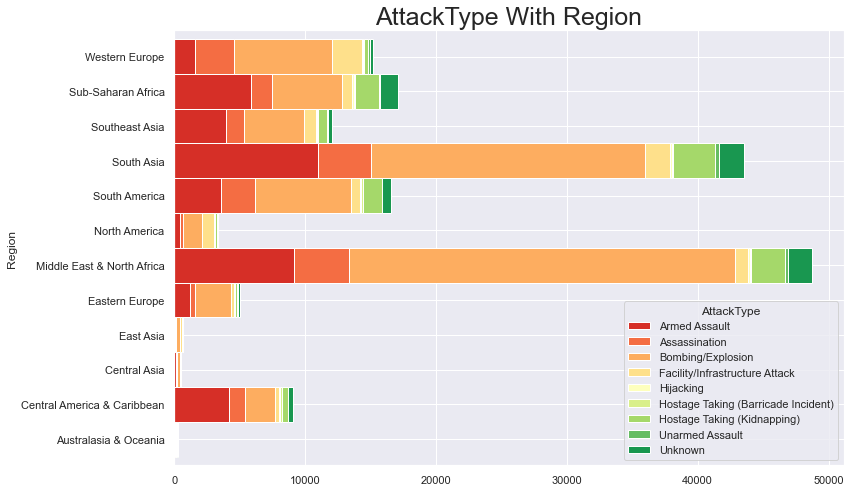

In [17]:
pd.crosstab(df.Region,df.AttackType).plot.barh(stacked=True,width=1,color=sns.color_palette('RdYlGn',9))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.title('AttackType With Region',fontsize=25)
plt.show()

Bombing and Armed assaults, as seen above are the most prominent types of Attack irrespective of Regions.

<a id='5'></a>
### Terrorism By Country

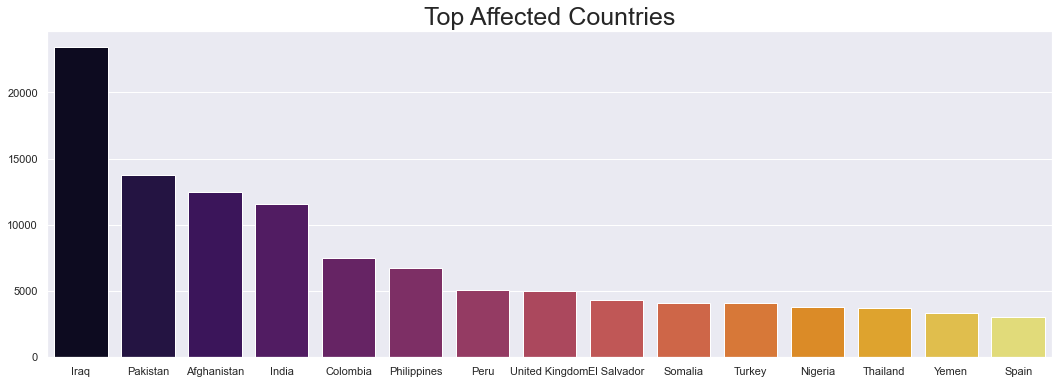

In [18]:
plt.subplots(figsize=(18,6))
sns.barplot(df['Country'].value_counts()[:15].index,df['Country'].value_counts()[:15].values,palette='inferno')
plt.title('Top Affected Countries',fontsize=25)
plt.show()

Iraq has witnessed a very large number of terrorist activities followed by Pakistan

<a id='6'></a>
### Attacks vs Killed

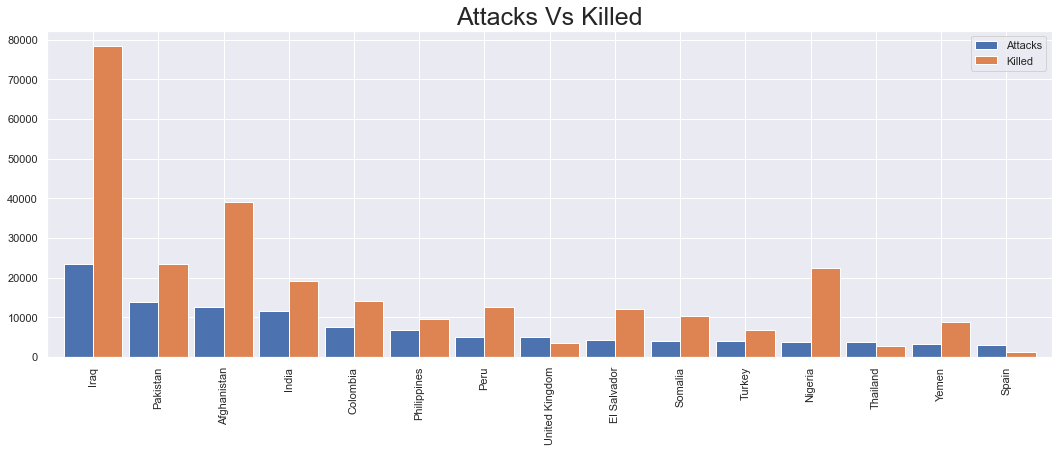

In [19]:
coun_terror=df['Country'].value_counts()[:15].to_frame()
coun_terror.columns=['Attacks']
coun_kill=df.groupby('Country')['Killed'].sum().to_frame()
coun_terror.merge(coun_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title('Attacks Vs Killed',fontsize=25)
plt.show()

Look at the killed bar for Iraq. The number of killed is almost 3 folds more than attacks for Iraq.

<a id='7'></a>
### Terroist Groups

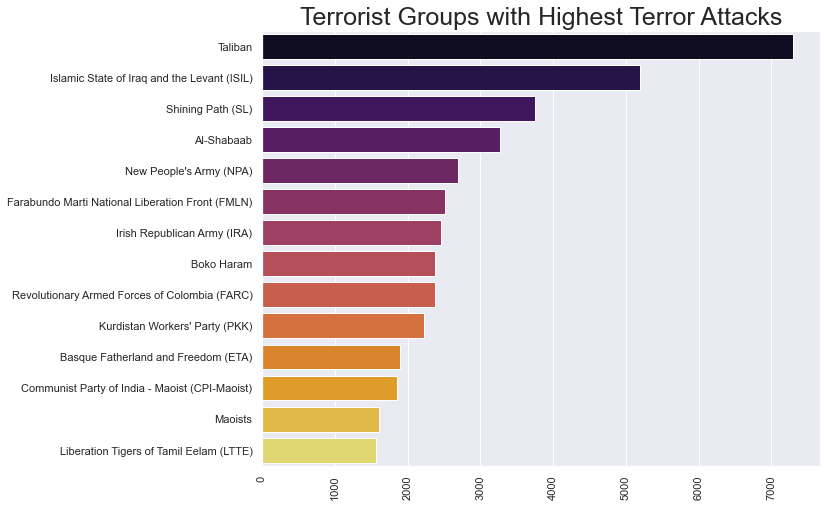

In [20]:
sns.barplot(df['Group'].value_counts()[1:15].values,df['Group'].value_counts()[1:15].index,palette=('inferno'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Groups with Highest Terror Attacks',fontsize=25)
plt.show()

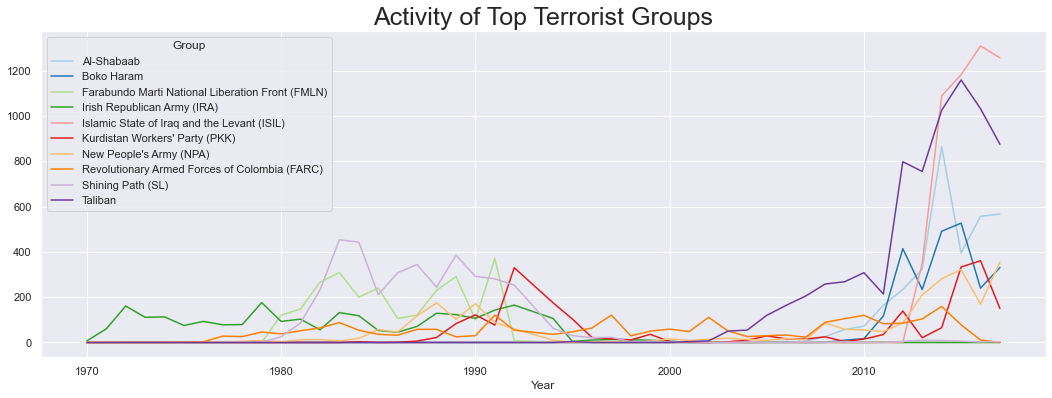

In [21]:
top_groups10=df[df['Group'].isin(df['Group'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.Year,top_groups10.Group).plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title('Activity of Top Terrorist Groups',fontsize=25)
plt.show()

The Irish Republican Army(IRA), is the oldest terrorist group started back in the 1970. Some of the groups that have started lately in 2000's like the ISIL and Taliban, have shown a shoot in the number of attacks in the past years.

<a id='8'></a>
### Terror Activities in Egypt

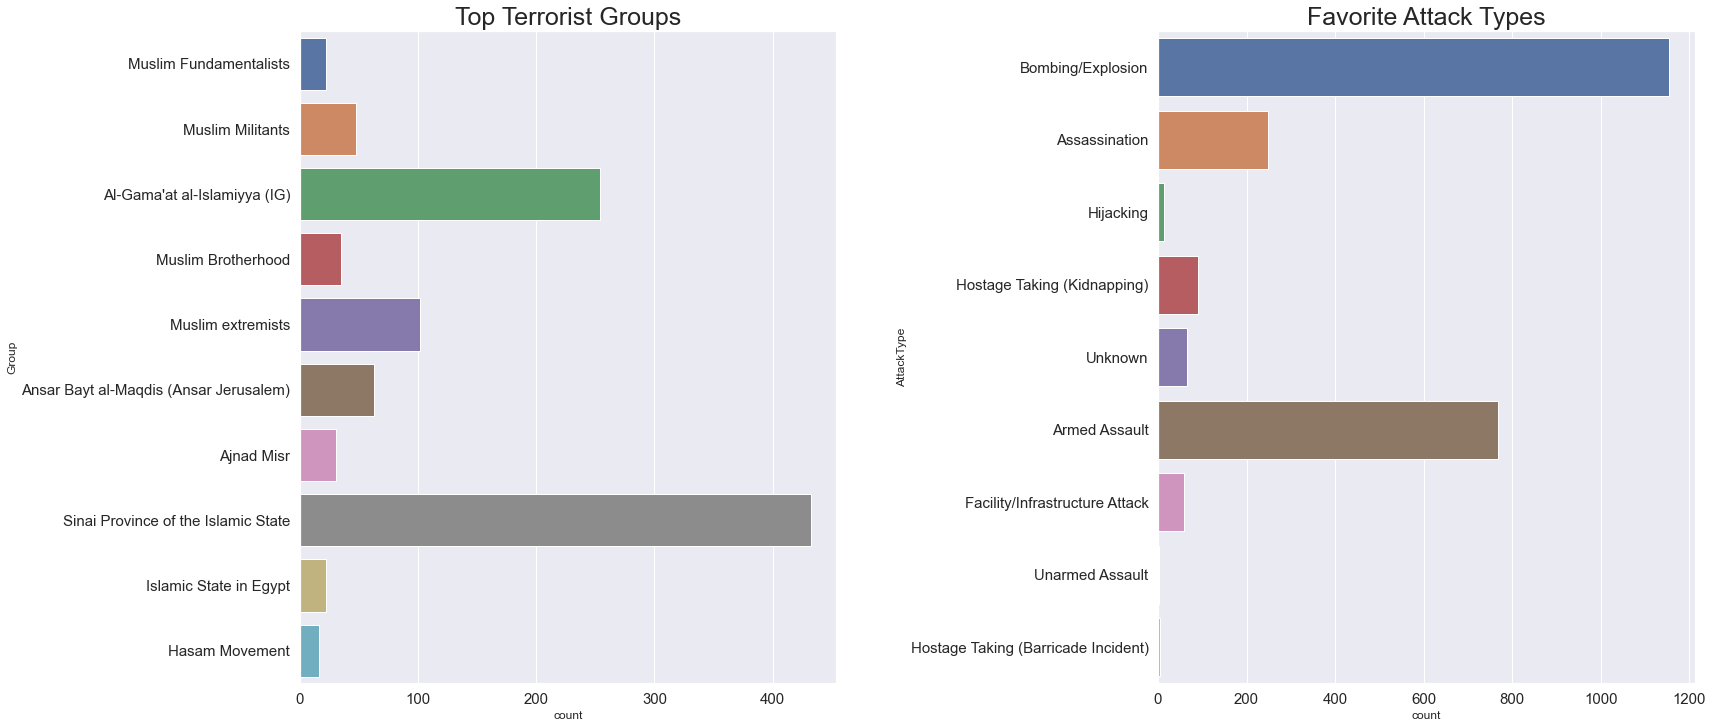

In [22]:
df_egy=df[df['Country']=='Egypt']
f,ax=plt.subplots(1,2,figsize=(25,12))
egy_groups=df_egy['Group'].value_counts()[1:11].index
egy_groups=df_egy[df_egy['Group'].isin(egy_groups)]
sns.countplot(y='Group',data=egy_groups,ax=ax[0])
sns.countplot(y='AttackType',data=df_egy,ax=ax[1])
plt.subplots_adjust(hspace=0.3,wspace=0.6)
ax[0].set_title('Top Terrorist Groups',fontsize=25)
ax[1].set_title('Favorite Attack Types',fontsize=25)
ax[0].tick_params(labelsize=15)
ax[1].tick_params(labelsize=15)
plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.



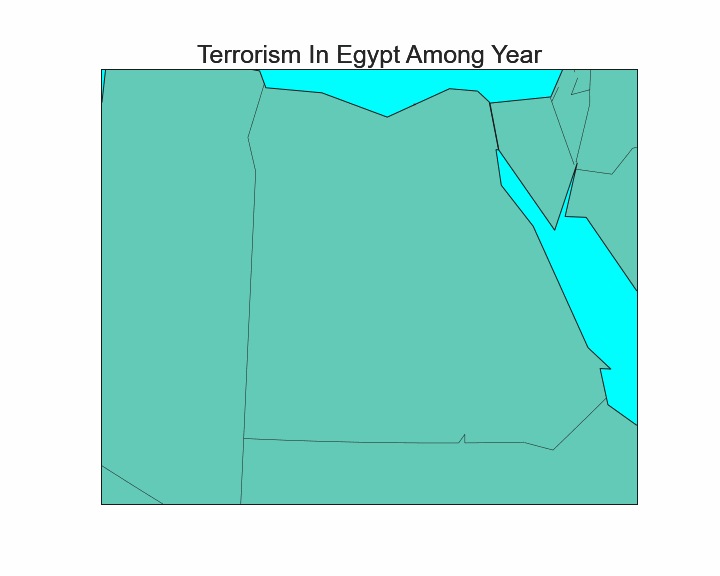

In [23]:
fig = plt.figure(figsize = (10,8))
def animate(Year):
    ax = plt.axes()
    ax.clear()
    ax.set_title('Terrorism In Egypt Among Year',fontsize=25)
    m6 = Basemap(urcrnrlat=32,urcrnrlon=37,llcrnrlat=20,llcrnrlon=21,
        projection='lcc',lat_0=26.7,lon_0=30.75)
    lat_gif1=list(df_egy[df_egy['Year']==Year].latitude)
    long_gif1=list(df_egy[df_egy['Year']==Year].longitude)
    x_gif1,y_gif1=m6(long_gif1,lat_gif1)
    m6.scatter(x_gif1, y_gif1,s=[killed+wounded for killed,wounded in zip(df_egy[df_egy['Year']==Year].Killed,df_egy[df_egy['Year']==Year].Wounded)],color ='r') 
    m6.drawcoastlines()
    m6.drawcountries()
    m6.fillcontinents(color='coral',lake_color='aqua', zorder = 1,alpha=0.4)
    m6.drawmapboundary(fill_color='aqua')
ani = animation.FuncAnimation(fig,animate,list(df_egy.Year.unique()), interval = 1500)    
ani.save('animation.gif', writer='imagemagick', fps=1)
plt.close(1)
filename = 'animation.gif'
video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

<a id='conclusions'></a>

# Conclusions
1. The number of terrorist activities have gone up sharply after 2000. 
2. Country with Highest Terrorist Attacks: Iraq
3. Regions with Highest Terrorist Attacks: Middle East & North Africa
4. Maximum people killed in an attack are: 1570.0 that took place in Iraq
5. The most Attack method used is `Bombing/Explosion`
6. Terrorism Targets the private Citizens & Property Mostly
7. Middle East and North Africa are the most terrorism prone regions followed by South Asia. Collectively we can say that The African and Asian Continent experience the highest terrorist attacks.
8. The number of killed is almost 3 folds more than attacks for Iraq.
9. The Irish Republican Army(IRA), is the oldest terrorist group started back in the 1970.
10. Some of the groups that have started lately in 2000's like the ISIL and Taliban, have shown a shoot in the number of attacks in the past years.